<a href="https://colab.research.google.com/github/LYZAcell/data_study/blob/main/BDA(%ED%86%B5%EA%B3%84)/%ED%95%84%EC%88%98_%EC%9D%B4%EA%B0%80%EC%98%8141_0810.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필수과제

데이터셋 공유 예정
분석은 자유, 통계적인 분석을 진행해 주시는데

 1. EDA를 통해 내가 분석할 가설을 먼저 확인해 주세요.(전체적인 탐색)
 2. 가설을 세우기 위한 어떤 날카로운 부분을 찾고 시각적인 차이를 코드로 짜고, 주석처리로 확인해 주시고
 3. 그 부분에 대해서 시각적인 것 외에 통계적인 분석을 통해 차이 등을 검정해 주세요!
    결과의 해석까지 주석처리로 부탁드립니다!

## 컬럼정리

[ 필수과제 컬럼 정리 ]
1. People
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

2. Products
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years


3. Promotion
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise


4. Place
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month


5. Target
Need to perform clustering to summarize customer segments.

# EDA

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [10]:
original_df = pd.read_csv('marketing_campaign.csv', sep='\t')
original_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [11]:
original_df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [12]:
original_df['NumWebPurchases']

,NumWebPurchases
0,8
1,1
2,8
3,2
4,5
...,...
2235,9
2236,8
2237,2
2238,6


## 가설세우기

- H0(귀무가설) : 직접 상점에 방문하는 횟수가 많은 사람이 웹으로 사는 사람보다 신선식품(채소, 고기, 생선)의 구매규모가 클 것이다
- H1(대립가설) : 직접 상점에 방문하는 횟수가 높은 사람보다 웹으로 사는 사람이 신선식품 구매규모가 클 것이다.

### 필요한 컬럼
- ID: Customer's unique identifier
- NumWebPurchases: Number of purchases made through the company’s website
- Year_Birth: Customer's birth year
- NumStorePurchases: Number of purchases made directly in stores
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years

In [13]:
df_sel = df[['ID','NumWebPurchases', 'Year_Birth', 'NumStorePurchases', 'MntFruits', 'MntMeatProducts', 'MntFishProducts']]
df_sel

,ID,NumWebPurchases,Year_Birth,NumStorePurchases,MntFruits,MntMeatProducts,MntFishProducts
0,5524,8,1957,4,88,546,172
1,2174,1,1954,2,1,6,2
2,4141,8,1965,10,49,127,111
3,6182,2,1984,4,4,20,10
4,5324,5,1981,6,43,118,46
...,...,...,...,...,...,...,...
2235,10870,9,1967,4,43,182,42
2236,4001,8,1946,5,0,30,0
2237,7270,2,1981,13,48,217,32
2238,8235,6,1956,10,30,214,80


In [14]:
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 2240 non-null   int64
 1   NumWebPurchases    2240 non-null   int64
 2   Year_Birth         2240 non-null   int64
 3   NumStorePurchases  2240 non-null   int64
 4   MntFruits          2240 non-null   int64
 5   MntMeatProducts    2240 non-null   int64
 6   MntFishProducts    2240 non-null   int64
dtypes: int64(7)
memory usage: 122.6 KB


In [15]:
df_sel.describe()

,ID,NumWebPurchases,Year_Birth,NumStorePurchases,MntFruits,MntMeatProducts,MntFishProducts
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,4.084821,1968.805804,5.790179,26.302232,166.950000,37.525446
std,3246.662198,2.778714,11.984069,3.250958,39.773434,225.715373,54.628979
min,0.000000,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,2.000000,1959.000000,3.000000,1.000000,16.000000,3.000000
50%,5458.500000,4.000000,1970.000000,5.000000,8.000000,67.000000,12.000000
75%,8427.750000,6.000000,1977.000000,8.000000,33.000000,232.000000,50.000000
max,11191.000000,27.000000,1996.000000,13.000000,199.000000,1725.000000,259.000000


# 가설검정 시작

In [17]:
df_sel

,ID,NumWebPurchases,Year_Birth,NumStorePurchases,MntFruits,MntMeatProducts,MntFishProducts
0,5524,8,1957,4,88,546,172
1,2174,1,1954,2,1,6,2
2,4141,8,1965,10,49,127,111
3,6182,2,1984,4,4,20,10
4,5324,5,1981,6,43,118,46
...,...,...,...,...,...,...,...
2235,10870,9,1967,4,43,182,42
2236,4001,8,1946,5,0,30,0
2237,7270,2,1981,13,48,217,32
2238,8235,6,1956,10,30,214,80


Text(0.5, 1.0, 'Store Purchases vs Fruit Spending')

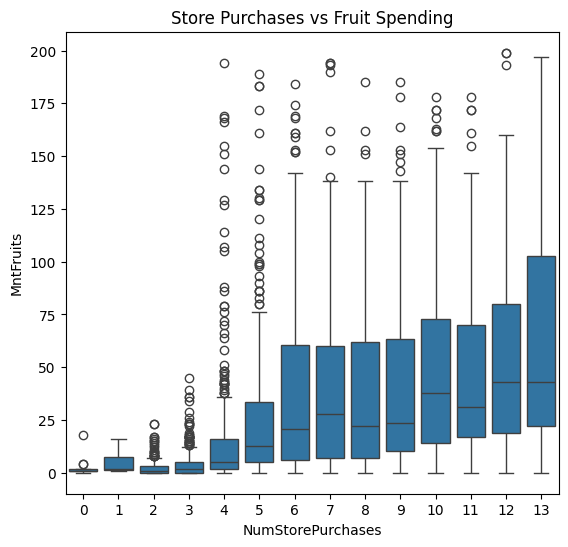

In [24]:
# 가게 방문횟수와과일소비량 시각화
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='NumStorePurchases', y='MntFruits', data=df)
plt.title('Store Purchases vs Fruit Spending')

Text(0.5, 1.0, 'Store Purchases vs Fruit Spending')

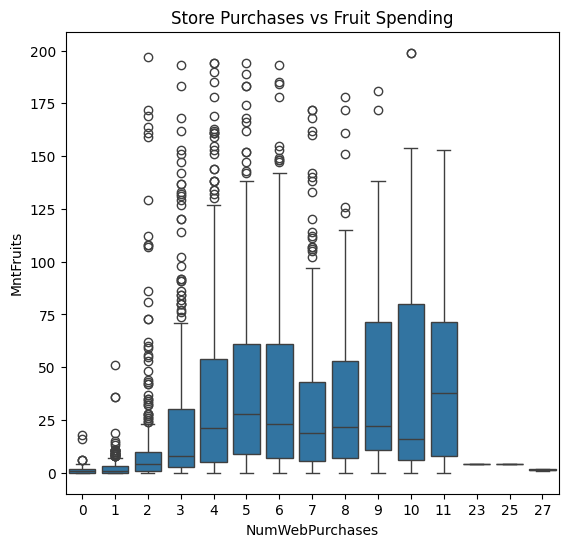

In [25]:
#웹쇼핑횟수와과일소비량 시각화 -> 방문횟수가 잦아도 전반적인 과일 구매량은 현장구매에 비해 부족함
plt.figure(figsize=(14, 6))

plt.subplot(1,2,2)
sns.boxplot(x='NumWebPurchases', y='MntFruits', data=df)
plt.title('Web Purchases vs Fruit Spending')

Text(0.5, 1.0, 'Store Purchases vs Meat Spending')

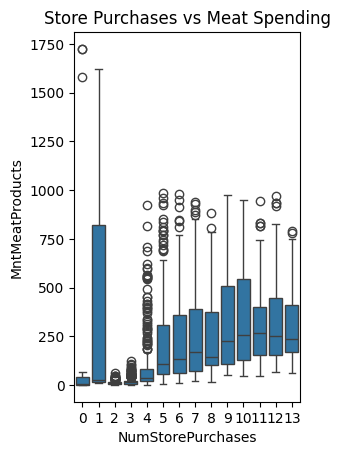

In [27]:
# 현장쇼핑 고기 구매량
plt.subplot(1, 2, 2)
sns.boxplot(x='NumStorePurchases', y='MntMeatProducts', data=df)
plt.title('Store Purchases vs Meat Spending')

Text(0.5, 1.0, 'Web Purchases vs Meat Spending')

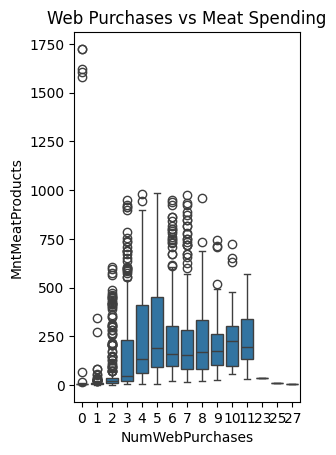

In [26]:
# 웹쇼핑 고기 구매량
plt.subplot(1, 2, 2)
sns.boxplot(x='NumWebPurchases', y='MntMeatProducts', data=df)
plt.title('Web Purchases vs Meat Spending')

Text(0.5, 1.0, 'Store Purchases vs Fish Spending')

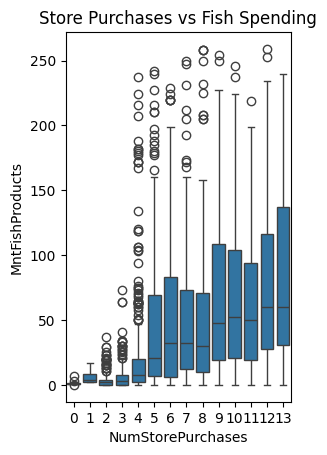

In [28]:
# 생선의 상점 소비량
plt.subplot(1, 2, 1)
sns.boxplot(x='NumStorePurchases', y='MntFishProducts', data=df)
plt.title('Store Purchases vs Fish Spending')

Text(0.5, 1.0, 'Web Purchases vs Fish Spending')

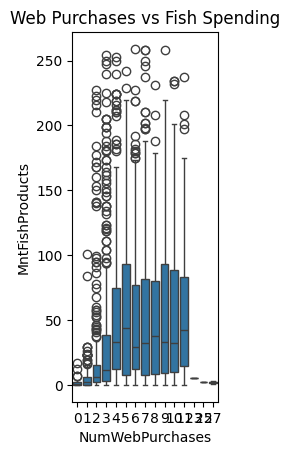

In [29]:
plt.subplot(1, 3, 3)
sns.boxplot(x='NumWebPurchases', y='MntFishProducts', data=df)
plt.title('Web Purchases vs Fish Spending')

In [30]:
df = df_sel

In [33]:
# 평균 비교 (Store vs Web Purchases)
store_high = df[df['NumStorePurchases'] > df['NumWebPurchases']]
web_high = df[df['NumWebPurchases'] > df['NumStorePurchases']]

# 통계 분석: t-test로 평균 비교
t_fruits, p_fruits = stats.ttest_ind(store_high['MntFruits'], web_high['MntFruits'], equal_var=False)
t_meat, p_meat = stats.ttest_ind(store_high['MntMeatProducts'], web_high['MntMeatProducts'], equal_var=False)
t_fish, p_fish = stats.ttest_ind(store_high['MntFishProducts'], web_high['MntFishProducts'], equal_var=False)

print(t_fruits, p_fruits)
print(t_meat, p_meat)
print(t_fish, p_fish)

0.9888564969590377 0.3231048427675115
1.153321409274213 0.24913751058395625
-0.35427419876319655 0.7232650863595815


### 결과해석
- p값이 모두 0.05 이상이므로 귀무가설이 유효하다. 즉 상점에 들르는 횟수가 높을수록 신선식품 구매규모가 크다.